In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/home/moshtasa/Research/phd-svd-recsys/Mobile/SVD/data/df_final.csv')

In [12]:
mobile = pd.read_csv("/home/moshtasa/Research/phd-svd-recsys/Mobile/SVD/data/mobile.csv")

In [13]:
mobile_rec = pd.read_csv("/home/moshtasa/Research/phd-svd-recsys/Mobile/SVD/data/mobilerec_final.csv")

In [17]:
app = pd.read_csv("/home/moshtasa/Research/phd-svd-recsys/Mobile/SVD/data/app_dataset_mapped.csv")

In [14]:
df

,user_id,app_id,category,rating
0,1,1,Strategy,4
1,2,2,Puzzle,3
2,3,3,Business,2
3,4,4,Simulation,1
4,5,5,Books & Reference,3
...,...,...,...,...
19140667,215802,8548,Trivia,4
19140668,247755,8803,Simulation,5
19140669,447422,3972,Food & Drink,5
19140670,309866,4525,Educational,5


In [15]:
mobile

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.rubicon.dev.gbwg,My precious,4,0,2012-11-15,PJ39h0O37yXMs1qm,2012-11-15,1.352956e+09,Strategy
1,com.disney.WMW,:(,3,0,2012-11-15,5tjD1NgUd74PbjoM,2012-11-15,1.352956e+09,Puzzle
2,com.mobisystems.editor.office_registered,What am I paying for?,2,0,2012-11-27,XTX8IOG0bGfCZQzy,2012-11-27,1.353992e+09,Business
3,com.steenriver.littlecrane,Don't pay!!,1,0,2012-11-27,97kpfhLZiAPJk8mN,2012-11-27,1.353992e+09,Simulation
4,com.dictionary.paid,Pretty good,3,1,2012-11-27,c43SneyoEPBIpxVf,2012-11-27,1.353992e+09,Books & Reference
...,...,...,...,...,...,...,...,...,...
19140667,com.etermax.trivialadder,Would go 5 stars but the hidden passage is rub...,4,0,2022-04-14,ElmAUGC4U4IdrWSM,2022-04-14,1.649909e+09,Trivia
19140668,com.alegrium.space.lion,Just insane,5,0,2022-04-14,a4p6OA3HZp7Bh3Ri,2022-04-14,1.649909e+09,Simulation
19140669,com.breadfast,good grocery delivery service 🌹,5,0,2022-04-14,fH7OlV3NLCbV5nrW,2022-04-14,1.649909e+09,Food & Drink
19140670,com.amayasoft.cars.kids.toddlers.garage.game,Good,5,0,2022-04-14,FwPmAnVCRQb8UUWq,2022-04-14,1.649909e+09,Educational


In [16]:
mobile_rec

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating
...,...,...,...,...,...,...,...,...,...
19297014,net.tandem,I created an account and have been waiting in ...,1,12,"December 7, 2020",bON82JF3LCF8lU7K,2020-12-07,1.607317e+09,Education
19297015,com.kurogame.gplay.punishing.grayraven.en,I'm sure a lot of people will rate this higher...,3,28,"July 31, 2021",bON82JF3LCF8lU7K,2021-07-31,1.627704e+09,Action
19297016,com.tempo.video.edit,It was cool for a while! but when i start to m...,5,0,"September 21, 2021",bON82JF3LCF8lU7K,2021-09-21,1.632197e+09,Video Players & Editors
19297017,com.nianticlabs.pokemongo,The latest update has rolled everything back t...,1,23,"January 20, 2022",bON82JF3LCF8lU7K,2022-01-20,1.642655e+09,Adventure


In [18]:
app.head(10)

,user_id,app_id,category,rating,subroot,root
0,1,1,Strategy,4,Strategy,Games
1,2,2,Puzzle,3,Puzzle,Games
2,3,3,Business,2,Business,Business & Finance
3,4,4,Simulation,1,Simulation,Games
4,5,5,Books & Reference,3,Books & Reference,Info & Reading
5,6,6,Health & Fitness,3,Health & Fitness,Health & Lifestyle
6,7,7,Arcade,4,Arcade,Games
7,8,8,Word,2,Word,Games
8,9,9,Entertainment,2,Entertainment,Media & Creativity
9,10,8,Word,2,Word,Games


In [19]:

# Unique counts
num_roots = app["root"].nunique()
num_categories = app["category"].nunique()

print(f"App dataset summary:")
print(f"Unique roots     : {num_roots}")
print(f"Unique categories: {num_categories}")


App dataset summary:
Unique roots     : 10
Unique categories: 48


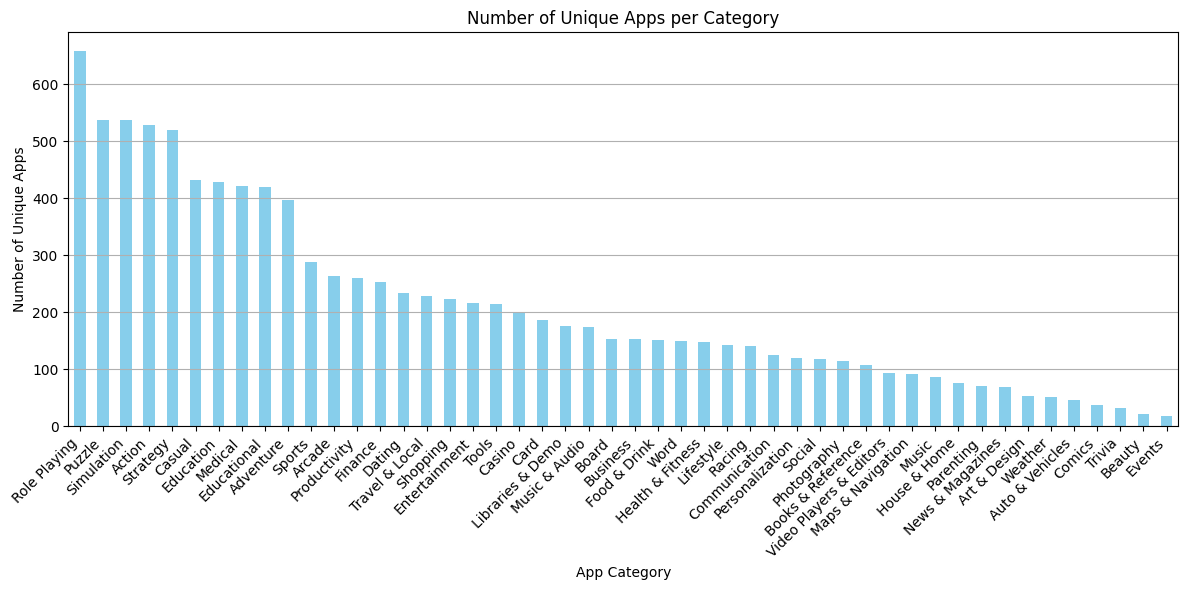


🔍 Missing Value Report:
Missing ratings: 0
Missing user IDs: 0
Missing categories: 0
Missing app IDs: 0

🧾 Number of duplicate rows: 0

📊 Total rows: 19140672
✅ Non-null ratings: 19140672
✔️ All rows have a rating.

📌 Dataset Summary:
Unique users: 700111
Unique apps: 10173
Unique categories: 48
Average ratings per user: 27.34
Min ratings per user: 4
Max ratings per user: 248

📦 Number of Unique Items per Category:
- Role Playing: 658 apps
- Puzzle: 537 apps
- Simulation: 537 apps
- Action: 529 apps
- Strategy: 520 apps
- Casual: 432 apps
- Education: 429 apps
- Medical: 422 apps
- Educational: 420 apps
- Adventure: 397 apps
- Sports: 289 apps
- Arcade: 264 apps
- Productivity: 260 apps
- Finance: 254 apps
- Dating: 234 apps
- Travel & Local: 228 apps
- Shopping: 223 apps
- Entertainment: 216 apps
- Tools: 214 apps
- Casino: 199 apps
- Card: 187 apps
- Libraries & Demo: 176 apps
- Music & Audio: 175 apps
- Board: 154 apps
- Business: 153 apps
- Food & Drink: 151 apps
- Word: 149 apps


In [20]:
df_final = app.copy()

# ========== User & App Statistics ==========
unique_users = df_final['user_id'].nunique()
unique_apps = df_final['app_id'].nunique()
ratings_per_user = df_final.groupby('user_id').size()
average_ratings_per_user = ratings_per_user.mean()
min_ratings_per_user = ratings_per_user.min()
max_ratings_per_user = ratings_per_user.max()

# ========== Category Statistics ==========
unique_categories = df_final['category'].nunique()
apps_per_category = df_final.groupby('category')['app_id'].nunique().sort_values(ascending=False)

def print_items_per_category(df):
    print("\n📦 Number of Unique Items per Category:")
    item_counts = df.groupby('category')['app_id'].nunique().sort_values(ascending=False)
    for category, count in item_counts.items():
        print(f"- {category}: {count} apps")

# ========== Plot: Apps per Category ==========
plt.figure(figsize=(12, 6))
apps_per_category.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Apps per Category')
plt.xlabel('App Category')
plt.ylabel('Number of Unique Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# ========== Missing Values ==========
missing_values = {
    "Missing ratings": df_final['rating'].isnull().sum(),
    "Missing user IDs": df_final['user_id'].isnull().sum(),
    "Missing categories": df_final['category'].isnull().sum(),
    "Missing app IDs": df_final['app_id'].isnull().sum()
}

print("\n🔍 Missing Value Report:")
for key, val in missing_values.items():
    print(f"{key}: {val}")

# ========== Duplicate Rows ==========
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")

# ========== Ratings Info ==========
total_rows = len(df_final)
non_null_ratings = df_final['rating'].notnull().sum()
print(f"\n📊 Total rows: {total_rows}")
print(f"✅ Non-null ratings: {non_null_ratings}")

if total_rows == non_null_ratings:
    print("✔️ All rows have a rating.")
else:
    print("⚠️ Some rows are missing a rating.")

# ========== Summary ==========
print("\n📌 Dataset Summary:")
print(f"Unique users: {unique_users}")
print(f"Unique apps: {unique_apps}")
print(f"Unique categories: {unique_categories}")
print(f"Average ratings per user: {average_ratings_per_user:.2f}")
print(f"Min ratings per user: {min_ratings_per_user}")
print(f"Max ratings per user: {max_ratings_per_user}")
print_items_per_category(df_final)


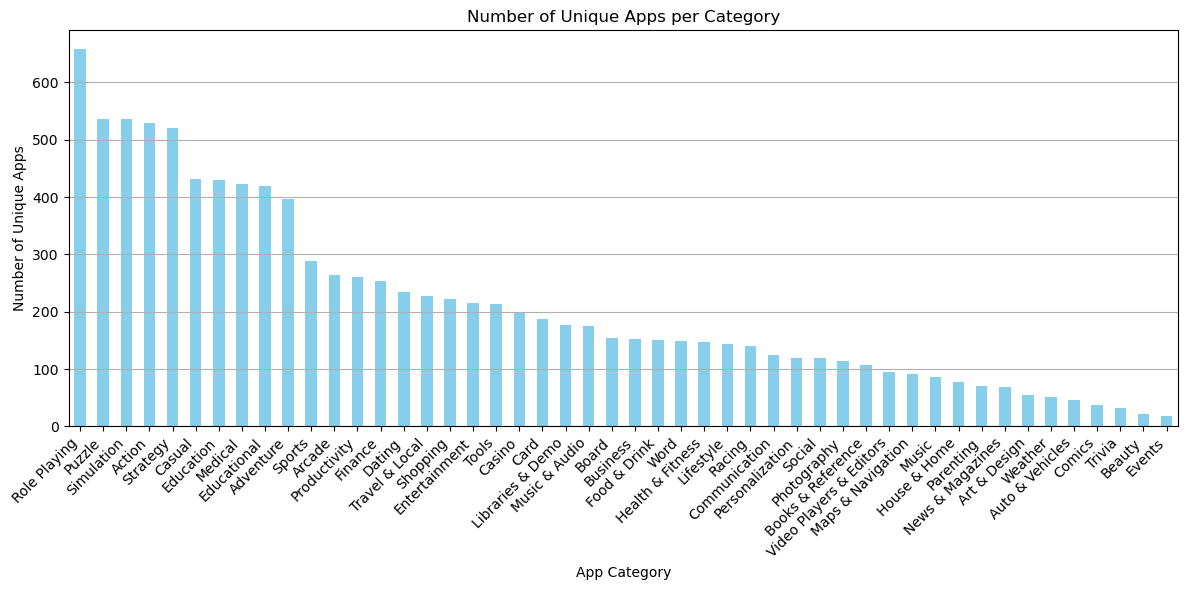


🔍 Missing Value Report:
Missing ratings: 0
Missing user IDs: 0
Missing categories: 0
Missing app IDs: 0

🧾 Number of duplicate rows: 0

📊 Total rows: 19140672
✅ Non-null ratings: 19140672
✔️ All rows have a rating.

📌 Dataset Summary:
Unique users: 700111
Unique apps: 10173
Unique categories: 48
Average ratings per user: 27.34
Min ratings per user: 4
Max ratings per user: 248

📦 Number of Unique Items per Category:
- Role Playing: 658 apps
- Puzzle: 537 apps
- Simulation: 537 apps
- Action: 529 apps
- Strategy: 520 apps
- Casual: 432 apps
- Education: 429 apps
- Medical: 422 apps
- Educational: 420 apps
- Adventure: 397 apps
- Sports: 289 apps
- Arcade: 264 apps
- Productivity: 260 apps
- Finance: 254 apps
- Dating: 234 apps
- Travel & Local: 228 apps
- Shopping: 223 apps
- Entertainment: 216 apps
- Tools: 214 apps
- Casino: 199 apps
- Card: 187 apps
- Libraries & Demo: 176 apps
- Music & Audio: 175 apps
- Board: 154 apps
- Business: 153 apps
- Food & Drink: 151 apps
- Word: 149 apps


In [9]:
df_final = pd.read_csv('/home/moshtasa/Research/phd-svd-recsys/SVD/MobileRec/data/df_final.csv')

# ========== User & App Statistics ==========
unique_users = df_final['user_id'].nunique()
unique_apps = df_final['app_id'].nunique()
ratings_per_user = df_final.groupby('user_id').size()
average_ratings_per_user = ratings_per_user.mean()
min_ratings_per_user = ratings_per_user.min()
max_ratings_per_user = ratings_per_user.max()

# ========== Category Statistics ==========
unique_categories = df_final['category'].nunique()
apps_per_category = df_final.groupby('category')['app_id'].nunique().sort_values(ascending=False)

def print_items_per_category(df):
    print("\n📦 Number of Unique Items per Category:")
    item_counts = df.groupby('category')['app_id'].nunique().sort_values(ascending=False)
    for category, count in item_counts.items():
        print(f"- {category}: {count} apps")

# ========== Plot: Apps per Category ==========
plt.figure(figsize=(12, 6))
apps_per_category.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Apps per Category')
plt.xlabel('App Category')
plt.ylabel('Number of Unique Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# ========== Missing Values ==========
missing_values = {
    "Missing ratings": df_final['rating'].isnull().sum(),
    "Missing user IDs": df_final['user_id'].isnull().sum(),
    "Missing categories": df_final['category'].isnull().sum(),
    "Missing app IDs": df_final['app_id'].isnull().sum()
}

print("\n🔍 Missing Value Report:")
for key, val in missing_values.items():
    print(f"{key}: {val}")

# ========== Duplicate Rows ==========
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")

# ========== Ratings Info ==========
total_rows = len(df_final)
non_null_ratings = df_final['rating'].notnull().sum()
print(f"\n📊 Total rows: {total_rows}")
print(f"✅ Non-null ratings: {non_null_ratings}")

if total_rows == non_null_ratings:
    print("✔️ All rows have a rating.")
else:
    print("⚠️ Some rows are missing a rating.")

# ========== Summary ==========
print("\n📌 Dataset Summary:")
print(f"Unique users: {unique_users}")
print(f"Unique apps: {unique_apps}")
print(f"Unique categories: {unique_categories}")
print(f"Average ratings per user: {average_ratings_per_user:.2f}")
print(f"Min ratings per user: {min_ratings_per_user}")
print(f"Max ratings per user: {max_ratings_per_user}")
print_items_per_category(df_final)


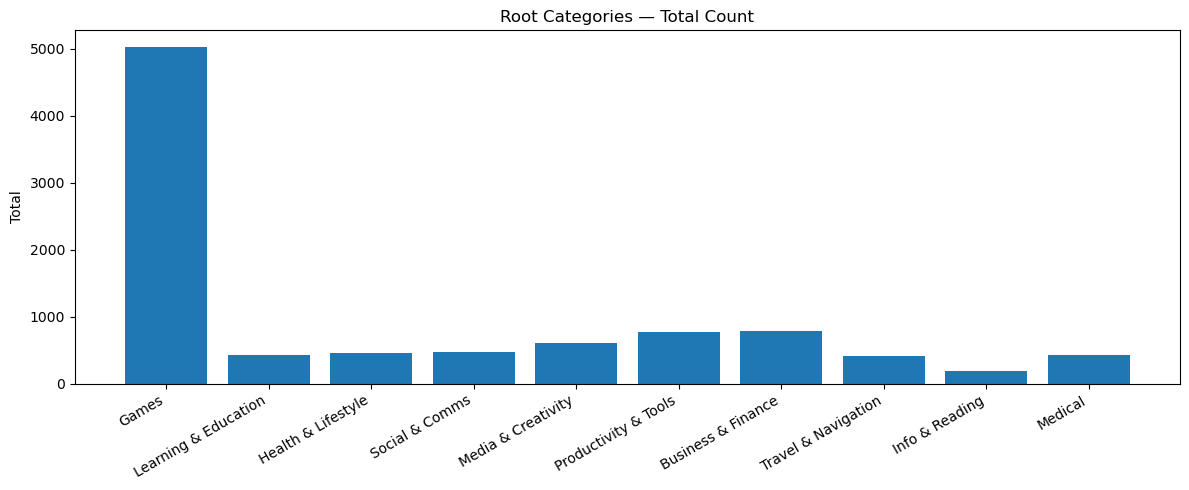

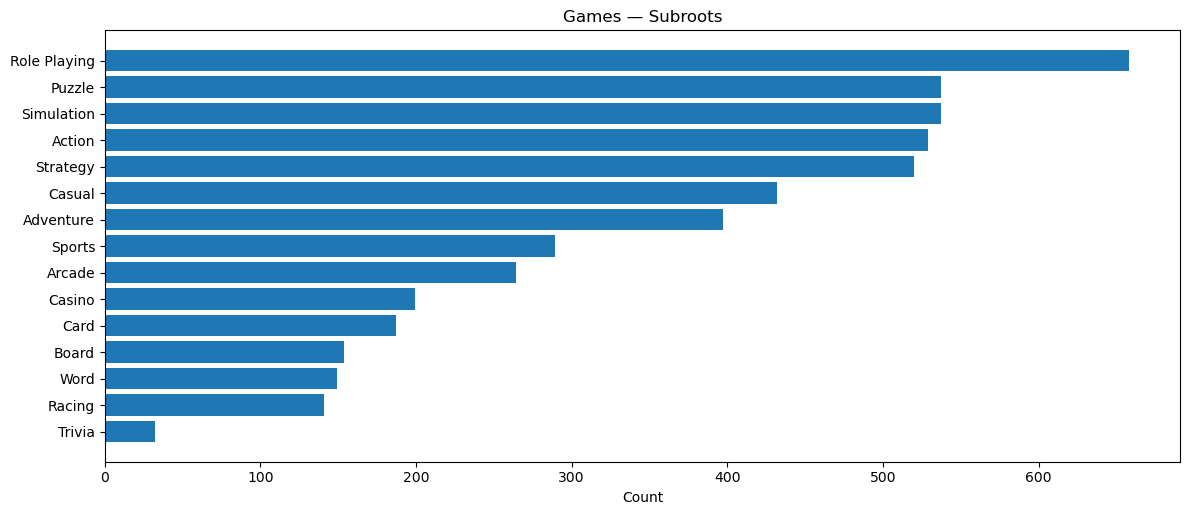

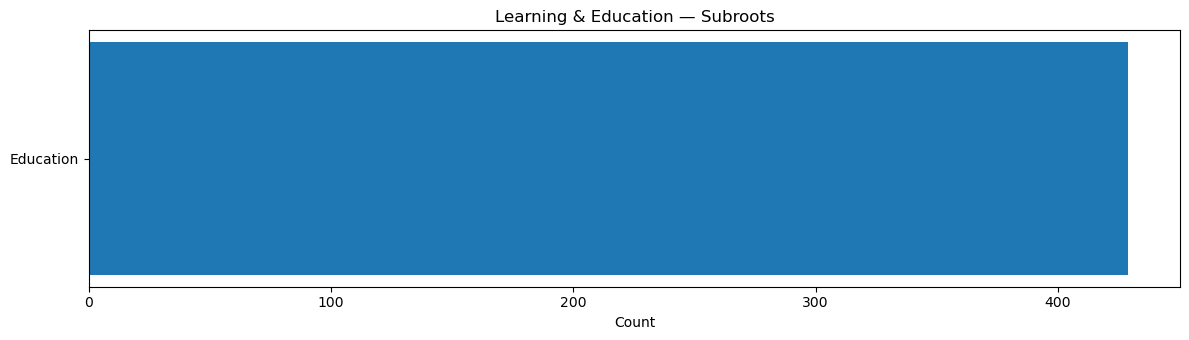

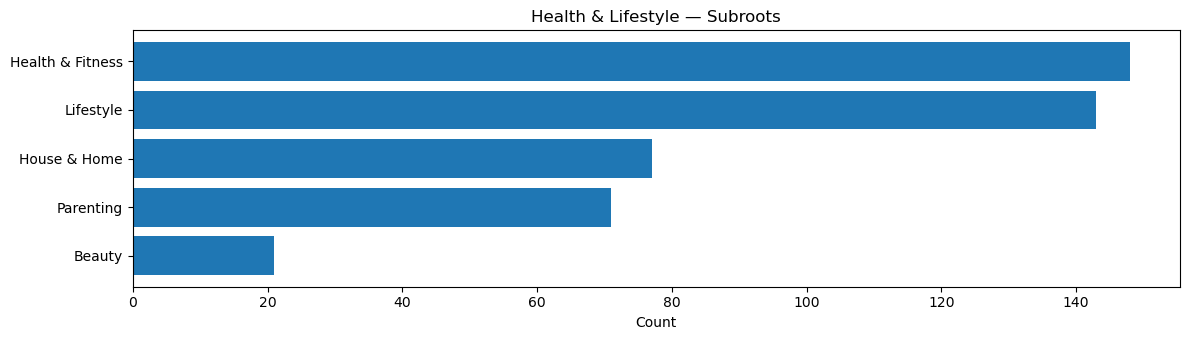

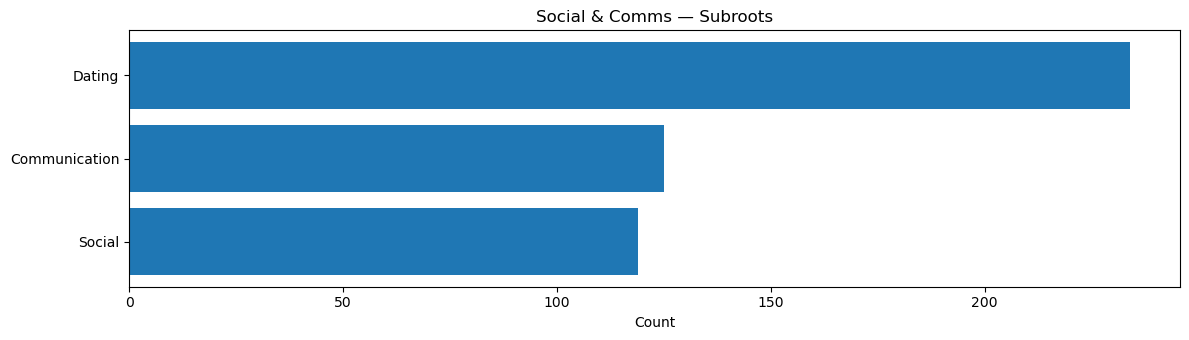

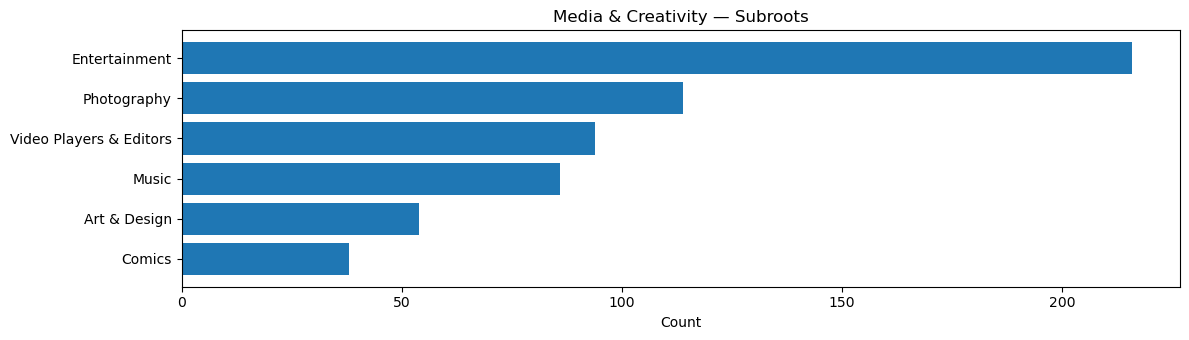

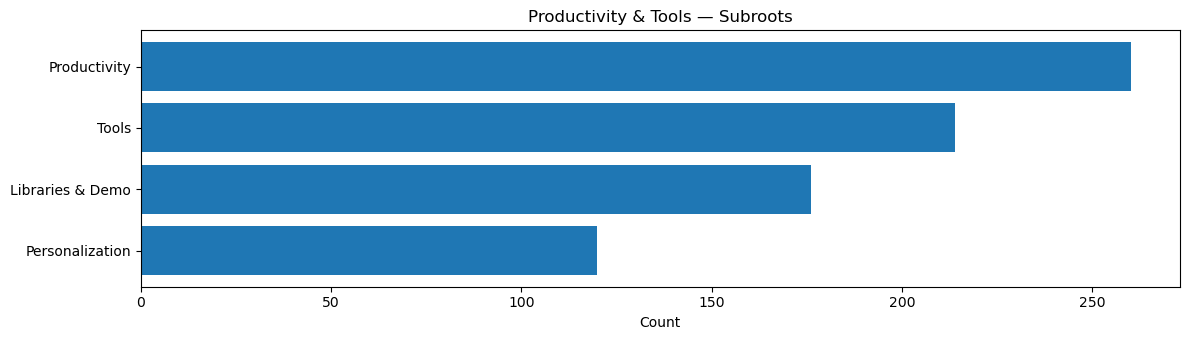

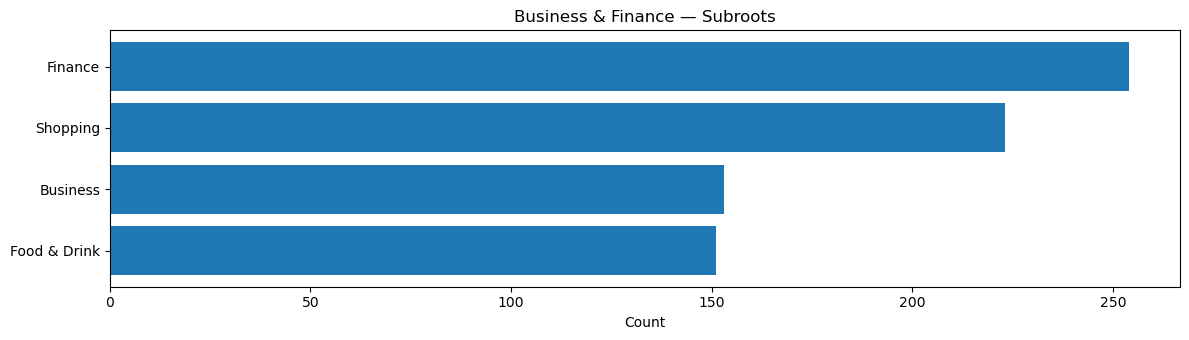

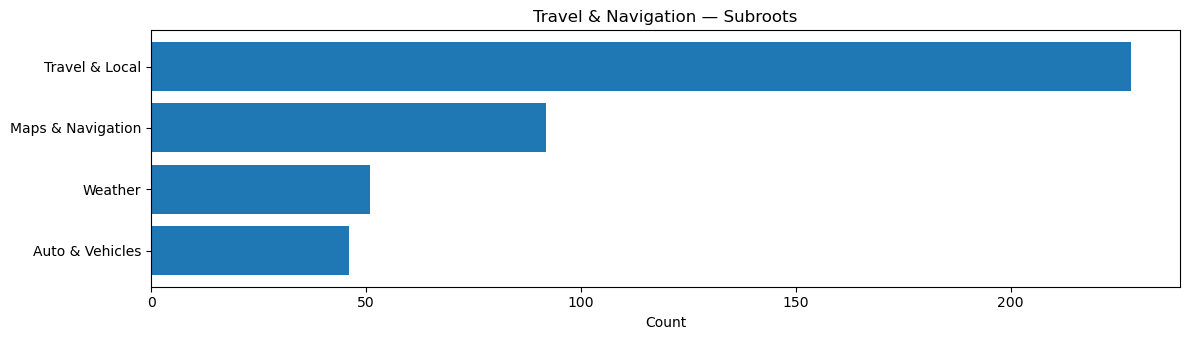

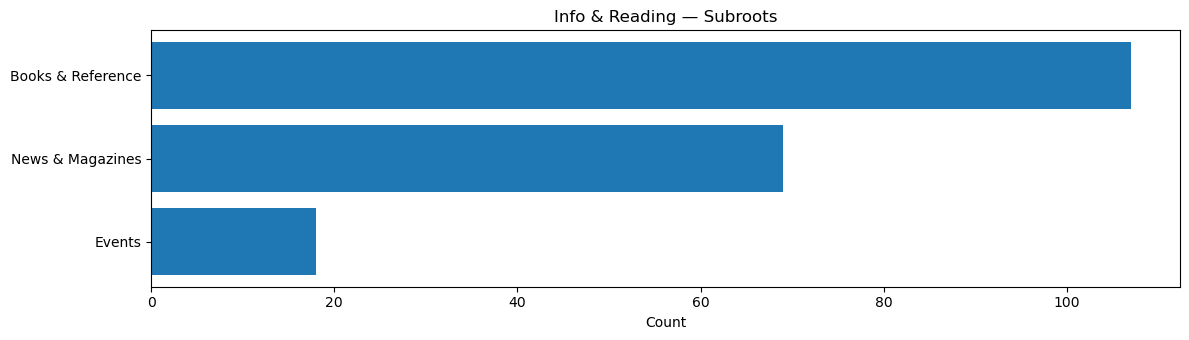

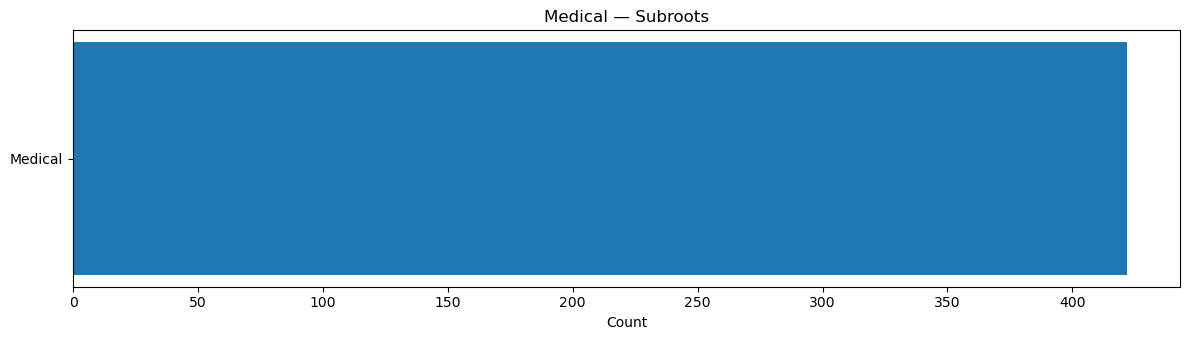


=== SIMPLE HIERARCHY (TEXT) ===
All Categories — total: 9,578
- Games  [total: 5,025]
   • Role Playing: 658
   • Puzzle: 537
   • Simulation: 537
   • Action: 529
   • Strategy: 520
   • Casual: 432
   • Adventure: 397
   • Sports: 289
   • Arcade: 264
   • Casino: 199
   • Card: 187
   • Board: 154
   • Word: 149
   • Racing: 141
   • Trivia: 32
- Learning & Education  [total: 429]
   • Education: 429
- Health & Lifestyle  [total: 460]
   • Health & Fitness: 148
   • Lifestyle: 143
   • House & Home: 77
   • Parenting: 71
   • Beauty: 21
- Social & Comms  [total: 478]
   • Dating: 234
   • Communication: 125
   • Social: 119
- Media & Creativity  [total: 602]
   • Entertainment: 216
   • Photography: 114
   • Video Players & Editors: 94
   • Music: 86
   • Art & Design: 54
   • Comics: 38
- Productivity & Tools  [total: 770]
   • Productivity: 260
   • Tools: 214
   • Libraries & Demo: 176
   • Personalization: 120
- Business & Finance  [total: 781]
   • Finance: 254
   • Shopping: 

In [15]:
# -*- coding: utf-8 -*-
import os
from collections import OrderedDict
import matplotlib.pyplot as plt

# ================== YOUR HIERARCHY (10 roots) ==================
hierarchy = OrderedDict({
    "Games": [
        "Action", "Adventure", "Arcade", "Board", "Card", "Casino",
        "Puzzle", "Racing", "Role Playing", "Simulation", "Sports",
        "Strategy", "Casual", "Trivia", "Word"
    ],
    "Learning & Education": ["Education"],
    "Health & Lifestyle": ["Health & Fitness", "Lifestyle", "Beauty", "Parenting", "House & Home"],
    "Social & Comms": ["Social", "Communication", "Dating"],
    "Media & Creativity": ["Entertainment", "Photography", "Video Players & Editors", "Music", "Art & Design", "Comics"],
    "Productivity & Tools": ["Productivity", "Tools", "Personalization", "Libraries & Demo"],
    "Business & Finance": ["Business", "Finance", "Shopping", "Food & Drink"],
    "Travel & Navigation": ["Travel & Local", "Maps & Navigation", "Auto & Vehicles", "Weather"],
    "Info & Reading": ["Books & Reference", "News & Magazines", "Events"],
    "Medical": ["Medical"],
})

# ================== (Optional) COUNTS FOR SUBROOTS ==================
leaf_counts = {
    "Role Playing": 658, "Puzzle": 537, "Simulation": 537,"Racing": 141, "Action": 529, "Strategy": 520,
    "Casual": 432, "Education": 429, "Medical": 422, "Adventure": 397, "Sports": 289,
    "Arcade": 264, "Productivity": 260, "Finance": 254, "Dating": 234, "Travel & Local": 228,
    "Shopping": 223, "Entertainment": 216, "Tools": 214, "Business": 153, "Health & Fitness": 148,
    "Lifestyle": 143, "Communication": 125, "Social": 119, "Photography": 114, "Books & Reference": 107,
    "Video Players & Editors": 94, "Maps & Navigation": 92, "Music": 86, "House & Home": 77,
    "Parenting": 71, "News & Magazines": 69, "Art & Design": 54, "Weather": 51,
    "Auto & Vehicles": 46, "Comics": 38, "Trivia": 32, "Beauty": 21, "Events": 18, "Card": 187,
    "Casino": 199, "Board": 154, "Word": 149, "Food & Drink": 151, "Personalization": 120,
    "Libraries & Demo": 176
}

# If a leaf has no provided count, treat as 0
def get_count(name): 
    return int(leaf_counts.get(name, 0))

# ================== OUTPUT FOLDER ==================
OUT_DIR = "simple_hierarchy_plots"
os.makedirs(OUT_DIR, exist_ok=True)

# ================== 1) ROOT TOTALS BAR CHART ==================
root_names = []
root_totals = []
for root, children in hierarchy.items():
    total = sum(get_count(c) for c in children)
    root_names.append(root)
    root_totals.append(total)

plt.figure(figsize=(12, 5))
plt.bar(root_names, root_totals)
plt.title("Root Categories — Total Count")
plt.ylabel("Total")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "00_roots_totals.png"), dpi=300)
plt.show()

# ================== 2) PER-ROOT SIMPLE BAR CHARTS ==================
for root, children in hierarchy.items():
    xs = []
    ys = []
    for c in children:
        xs.append(c)
        ys.append(get_count(c))

    plt.figure(figsize=(12, max(3.5, 0.35 * len(children))))
    # sort descending for readability
    pairs = sorted(zip(xs, ys), key=lambda t: t[1], reverse=True)
    labels, vals = zip(*pairs) if pairs else ([], [])
    plt.barh(labels, vals)
    plt.title(f"{root} — Subroots")
    plt.xlabel("Count")
    plt.gca().invert_yaxis()  # largest on top
    plt.tight_layout()
    fname = os.path.join(OUT_DIR, f"{root.replace(' & ', '_').replace(' ', '_')}.png")
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.show()

# ================== 3) COMPACT TEXT TREE (printed) ==================
grand_total = sum(root_totals) if root_totals else 0
print("\n=== SIMPLE HIERARCHY (TEXT) ===")
print(f"All Categories — total: {grand_total:,}")
for root, children in hierarchy.items():
    r_total = sum(get_count(c) for c in children)
    print(f"- {root}  [total: {r_total:,}]")
    for c in sorted(children, key=lambda name: get_count(name), reverse=True):
        print(f"   • {c}: {get_count(c):,}")
print(f"\nSaved figures in: {os.path.abspath(OUT_DIR)}")


### mapping

In [17]:
# -*- coding: utf-8 -*-
"""
Map app categories (subroots) to 10 top-level roots across the entire dataset.
Expected df columns: ['user_id', 'app_id', 'category', 'rating'] (rating optional for mapping)
"""

import pandas as pd

# ================== 1) NORMALIZATION (synonyms / variants) ==================
CANONICAL_FIX = {
    "Educational": "Education",
    "Music & Audio": "Music",
}
def normalize_category(cat: str) -> str:
    c = (cat or "").strip()
    return CANONICAL_FIX.get(c, c)

# ================== 2) TAXONOMY: SUBROOT -> ROOT (10 roots) ==================
ROOT_BY_SUBROOT = {
    # Games
    "Action": "Games", "Adventure": "Games", "Arcade": "Games", "Board": "Games",
    "Card": "Games", "Casino": "Games", "Puzzle": "Games", "Racing": "Games",
    "Role Playing": "Games", "Simulation": "Games", "Sports": "Games",
    "Strategy": "Games", "Casual": "Games", "Trivia": "Games", "Word": "Games",

    # Learning & Education
    "Education": "Learning & Education",

    # Health & Lifestyle
    "Health & Fitness": "Health & Lifestyle", "Lifestyle": "Health & Lifestyle",
    "Beauty": "Health & Lifestyle", "Parenting": "Health & Lifestyle",
    "House & Home": "Health & Lifestyle",

    # Social & Comms
    "Social": "Social & Comms", "Communication": "Social & Comms", "Dating": "Social & Comms",

    # Media & Creativity
    "Entertainment": "Media & Creativity", "Photography": "Media & Creativity",
    "Video Players & Editors": "Media & Creativity", "Music": "Media & Creativity",
    "Art & Design": "Media & Creativity", "Comics": "Media & Creativity",

    # Productivity & Tools
    "Productivity": "Productivity & Tools", "Tools": "Productivity & Tools",
    "Personalization": "Productivity & Tools", "Libraries & Demo": "Productivity & Tools",

    # Business & Finance
    "Business": "Business & Finance", "Finance": "Business & Finance",
    "Shopping": "Business & Finance", "Food & Drink": "Business & Finance",

    # Travel & Navigation
    "Travel & Local": "Travel & Navigation", "Maps & Navigation": "Travel & Navigation",
    "Auto & Vehicles": "Travel & Navigation", "Weather": "Travel & Navigation",

    # Info & Reading
    "Books & Reference": "Info & Reading", "News & Magazines": "Info & Reading",
    "Events": "Info & Reading",

    # Medical
    "Medical": "Medical",
}

# ================== 3) MAP THE WHOLE DATAFRAME ==================
def map_to_roots(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "category" not in df.columns:
        raise ValueError("Expected a 'category' column in df.")

    # Normalize subroot labels
    df["subroot"] = df["category"].astype(str).map(normalize_category)

    # Assign root for each row
    df["root"] = df["subroot"].map(ROOT_BY_SUBROOT)

    # Diagnostics: find any unmapped subroots
    unmapped = df[df["root"].isna()]["subroot"].value_counts()
    if len(unmapped) > 0:
        print("\n[WARN] Unmapped subroots detected (top 20 shown). "
              "Add them to ROOT_BY_SUBROOT or CANONICAL_FIX:")
        print(unmapped.head(20))
    else:
        print("\n[OK] All rows successfully mapped to one of the 10 roots.")

    return df

# ================== 4) SUMMARIES (counts, users, apps) ==================
def summarize(df_mapped: pd.DataFrame):
    print("\n=== ROOT SUMMARY (by interactions/rows) ===")
    root_rows = df_mapped["root"].value_counts(dropna=False).rename("rows")
    print(root_rows)

    # Unique users per root
    users_by_root = df_mapped.groupby("root")["user_id"].nunique().rename("unique_users").sort_values(ascending=False)

    # Unique apps per root
    apps_by_root = df_mapped.groupby("root")["app_id"].nunique().rename("unique_apps").sort_values(ascending=False)

    # Combine into one table
    total_rows = len(df_mapped)
    out = pd.concat([root_rows, users_by_root, apps_by_root], axis=1).fillna(0).astype({"rows":"int","unique_users":"int","unique_apps":"int"})
    out["row_%"] = (out["rows"] / max(total_rows, 1) * 100).round(2)

    print("\n=== ROOT SUMMARY (rows, %, unique_users, unique_apps) ===")
    print(out.sort_values("rows", ascending=False))

    # Optional: per-root, per-subroot unique apps (wide table)
    per_subroot_apps = (
        df_mapped.groupby(["root", "subroot"])["app_id"].nunique()
        .rename("unique_apps")
        .reset_index()
        .sort_values(["root", "unique_apps"], ascending=[True, False])
    )
    print("\n=== UNIQUE APPS by (root, subroot) ===")
    print(per_subroot_apps.head(30))  # show top 30 rows for a quick glance

    return out, per_subroot_apps

# ================== 5) USAGE ==================
# df = ...  # your dataframe (user_id, app_id, category, rating)
df_mapped = map_to_roots(df)
root_summary, subroot_summary = summarize(df_mapped)

# Optionally save:
root_summary.to_csv("root_summary.csv")
subroot_summary.to_csv("subroot_unique_apps.csv", index=False)



[OK] All rows successfully mapped to one of the 10 roots.

=== ROOT SUMMARY (by interactions/rows) ===
Games                   10004591
Business & Finance       1897288
Media & Creativity       1823577
Productivity & Tools     1343006
Social & Comms           1097465
Health & Lifestyle        887492
Learning & Education      762798
Travel & Navigation       642040
Info & Reading            377748
Medical                   304667
Name: rows, dtype: int64

=== ROOT SUMMARY (rows, %, unique_users, unique_apps) ===
                          rows  unique_users  unique_apps  row_%
Games                 10004591        695017         5025  52.27
Business & Finance     1897288        460567          781   9.91
Media & Creativity     1823577        452406          777   9.53
Productivity & Tools   1343006        395885          770   7.02
Social & Comms         1097465        360739          478   5.73
Health & Lifestyle      887492        325348          460   4.64
Learning & Education    762

In [19]:
# -*- coding: utf-8 -*-
"""
Map app categories (subroots) to 10 roots and save full mapped dataset as CSV.
Expected columns: ['user_id', 'app_id', 'category', 'rating']
"""

import pandas as pd
import os

# ================== 1) CATEGORY NORMALIZATION ==================
CANONICAL_FIX = {
    "Educational": "Education",
    "Music & Audio": "Music",
}
def normalize_category(cat: str) -> str:
    c = (cat or "").strip()
    return CANONICAL_FIX.get(c, c)

# ================== 2) TAXONOMY: SUBROOT → ROOT (10 ROOTS) ==================
ROOT_BY_SUBROOT = {
    # Games
    "Action": "Games", "Adventure": "Games", "Arcade": "Games", "Board": "Games",
    "Card": "Games", "Casino": "Games", "Puzzle": "Games", "Racing": "Games",
    "Role Playing": "Games", "Simulation": "Games", "Sports": "Games",
    "Strategy": "Games", "Casual": "Games", "Trivia": "Games", "Word": "Games",

    # Learning & Education
    "Education": "Learning & Education",

    # Health & Lifestyle
    "Health & Fitness": "Health & Lifestyle", "Lifestyle": "Health & Lifestyle",
    "Beauty": "Health & Lifestyle", "Parenting": "Health & Lifestyle",
    "House & Home": "Health & Lifestyle",

    # Social & Comms
    "Social": "Social & Comms", "Communication": "Social & Comms", "Dating": "Social & Comms",

    # Media & Creativity
    "Entertainment": "Media & Creativity", "Photography": "Media & Creativity",
    "Video Players & Editors": "Media & Creativity", "Music": "Media & Creativity",
    "Art & Design": "Media & Creativity", "Comics": "Media & Creativity",

    # Productivity & Tools
    "Productivity": "Productivity & Tools", "Tools": "Productivity & Tools",
    "Personalization": "Productivity & Tools", "Libraries & Demo": "Productivity & Tools",

    # Business & Finance
    "Business": "Business & Finance", "Finance": "Business & Finance",
    "Shopping": "Business & Finance", "Food & Drink": "Business & Finance",

    # Travel & Navigation
    "Travel & Local": "Travel & Navigation", "Maps & Navigation": "Travel & Navigation",
    "Auto & Vehicles": "Travel & Navigation", "Weather": "Travel & Navigation",

    # Info & Reading
    "Books & Reference": "Info & Reading", "News & Magazines": "Info & Reading",
    "Events": "Info & Reading",

    # Medical
    "Medical": "Medical",
}

# ================== 3) MAP THE DATASET ==================
def map_to_roots(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    if "category" not in df.columns:
        raise ValueError("Expected a 'category' column in df.")

    # Normalize and map
    df["subroot"] = df["category"].astype(str).map(normalize_category)
    df["root"] = df["subroot"].map(ROOT_BY_SUBROOT)

    # Check unmapped categories
    unmapped = df[df["root"].isna()]["subroot"].value_counts()
    if len(unmapped) > 0:
        print("\n⚠️ Warning: Some categories were not mapped — please review:")
        print(unmapped.head(20))
    else:
        print("\n✅ All categories successfully mapped to 10 roots.")

    return df

# ================== 4) SAVE LARGE DATAFRAME SAFELY TO CSV ==================
def save_large_csv(df: pd.DataFrame, path: str, chunksize: int = 1_000_000):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    print(f"\n💾 Saving mapped dataset to CSV: {path}")
    with open(path, "w", encoding="utf-8", newline="") as f:
        header = True
        for start in range(0, len(df), chunksize):
            end = min(start + chunksize, len(df))
            df.iloc[start:end].to_csv(f, index=False, header=header)
            header = False
            print(f"  → Saved rows {start:,}–{end:,}")
    print("✅ Done — full mapped CSV saved successfully!")

# ================== 5) USAGE EXAMPLE ==================
# df = pd.read_csv("/path/to/your/original_dataset.csv")  # e.g., your 19M-row data
# df_mapped = map_to_roots(df)

# output path
OUTPUT_PATH = "/home/moshtasa/Research/phd-svd-recsys/SVD/MobileRec/data/app_dataset_mapped.csv"
save_large_csv(df_mapped, OUTPUT_PATH)



💾 Saving mapped dataset to CSV: /home/moshtasa/Research/phd-svd-recsys/SVD/MobileRec/data/app_dataset_mapped.csv
  → Saved rows 0–1,000,000
  → Saved rows 1,000,000–2,000,000
  → Saved rows 2,000,000–3,000,000
  → Saved rows 3,000,000–4,000,000
  → Saved rows 4,000,000–5,000,000
  → Saved rows 5,000,000–6,000,000
  → Saved rows 6,000,000–7,000,000
  → Saved rows 7,000,000–8,000,000
  → Saved rows 8,000,000–9,000,000
  → Saved rows 9,000,000–10,000,000
  → Saved rows 10,000,000–11,000,000
  → Saved rows 11,000,000–12,000,000
  → Saved rows 12,000,000–13,000,000
  → Saved rows 13,000,000–14,000,000
  → Saved rows 14,000,000–15,000,000
  → Saved rows 15,000,000–16,000,000
  → Saved rows 16,000,000–17,000,000
  → Saved rows 17,000,000–18,000,000
  → Saved rows 18,000,000–19,000,000
  → Saved rows 19,000,000–19,140,672
✅ Done — full mapped CSV saved successfully!


### adding synthatic

In [ ]:
# -*- coding: utf-8 -*-
"""
Generate synthetic users who rate apps belonging to a specific root category.
Each synthetic user rates:
  - Apps in their target root  → 5 (positive)
  - All other apps             → 1 (negative)
Cohort sizes correspond to scaled percentages (27, 105, 2643, 105 users).
"""

import pandas as pd
import numpy as np
from pathlib import Path

# ========== CONFIG ==========
INPUT_CSV = Path("/home/moshtasa/Research/phd-svd-recsys/SVD/MobileRec/notebook/1101/app_dataset_mapped.csv")
OUTPUT_DIR = Path("/home/moshtasa/Research/phd-svd-recsys/SVD/MobileRec/result/rec/top_re/1102/data/SINGLE_ROOT_INJECTION")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Synthetic cohort sizes (scaled from 700k users)
COHORTS = [27, 105, 2643, 105]  # adjust as needed

# Ratings
POS_RATING = 5
NEG_RATING = 1

# Random seed for reproducibility
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)

# ========== LOAD DATA ==========
print("📂 Loading dataset...")
df = pd.read_csv(INPUT_CSV)
print(f"✅ Loaded {len(df):,} rows | {df['app_id'].nunique():,} apps | {df['user_id'].nunique():,} users | {df['root'].nunique()} roots")

# Ensure necessary columns exist
required_cols = {"user_id", "app_id", "rating", "root"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# ========== ROOTS TO PROCESS ==========
roots = sorted(df["root"].dropna().unique())
print(f"\n🎯 Found {len(roots)} roots: {roots}")

# ========== GENERATE SYNTHETIC USERS ==========
for root in roots:
    df_target = df[df["root"] == root]
    df_non_target = df[df["root"] != root]

    pos_apps = df_target["app_id"].unique()
    neg_apps = df_non_target["app_id"].unique()

    print(f"\n⚙️ Generating synthetic users for root: {root}")
    print(f"   Positive apps: {len(pos_apps):,} | Negative apps: {len(neg_apps):,}")

    for n_users in COHORTS:
        syn_rows = []

        for u in range(n_users):
            syn_user_id = f"syn_{root[:4]}_{n_users}_{u+1}"
            # Positive ratings
            pos_df = pd.DataFrame({
                "user_id": syn_user_id,
                "app_id": pos_apps,
                "rating": POS_RATING,
                "root": root
            })
            # Negative ratings
            neg_df = pd.DataFrame({
                "user_id": syn_user_id,
                "app_id": rng.choice(neg_apps, size=min(len(neg_apps), len(pos_apps)), replace=False),
                "rating": NEG_RATING,
                "root": "Other"
            })
            syn_rows.append(pd.concat([pos_df, neg_df], ignore_index=True))

        df_syn = pd.concat(syn_rows, ignore_index=True)
        out_path = OUTPUT_DIR / f"synthetic_{root.replace(' ', '_')}_{n_users}u_pos5_neg1.csv"
        df_syn.to_csv(out_path, index=False)
        print(f"   ✅ Saved {n_users} synthetic users → {out_path.name} ({len(df_syn):,} rows)")

print("\n🏁 Completed all root injections.")
print(f"📁 Output directory: {OUTPUT_DIR.resolve()}")
